In [ ]:
# Rupesh Nitin Bharambe (AI3007)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
# Using a Dataset with Noise
np.random.seed(42)
noise = np.random.normal(0, 0.5, X.shape) 
X_noisy = X + noise

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 1. Overfitting Phase

# Create a complex neural network model
overfitting_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=5000,
random_state=42)
overfitting_model.fit(X_train, y_train)

# Predictions
y_train_pred = overfitting_model.predict(X_train)
y_test_pred = overfitting_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Overfitting Phase:")
print(f"Test Accuracy: {test_accuracy:.4f}")

Overfitting Phase:
Test Accuracy: 0.8333


In [29]:
# 2. Overcoming Overfitting Phase
# Create a simpler neural network model
simplified_model = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=42)
"Smaller hidden layer"
simplified_model.fit(X_train, y_train)

# Predictions
y_train_pred_simplified = simplified_model.predict(X_train)
y_test_pred_simplified = simplified_model.predict(X_test)

# Calculate accuracy
train_accuracy_simplified = accuracy_score(y_train, y_train_pred_simplified)

test_accuracy_simplified = accuracy_score(y_test, y_test_pred_simplified)

print("\n Overfitting Problem Resolved:")
print(f"Test Accuracy: {test_accuracy_simplified:.4f}")


 Overfitting Problem Resolved:
Test Accuracy: 0.9667


C:\Users\rupes\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


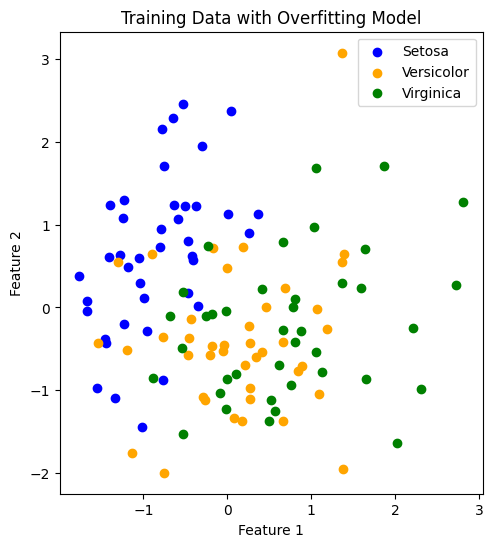

In [37]:
# Visualization (Optional)
plt.figure(figsize=(12, 6))

# Plot for overfitting model
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Setosa')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Versicolor')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='green', label='Virginica')
plt.title('Training Data with Overfitting Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

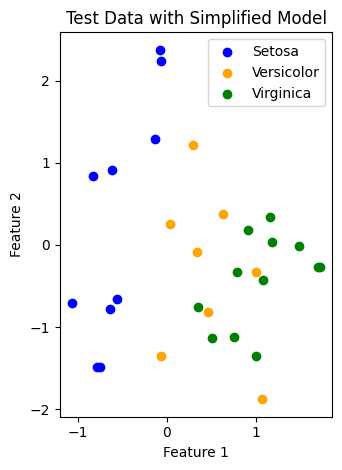

In [45]:
# Plot for simplified model
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test_pred_simplified == 0][:, 0], X_test[y_test_pred_simplified == 0][:, 1],
color='blue', label='Setosa')
plt.scatter(X_test[y_test_pred_simplified == 1][:, 0], X_test[y_test_pred_simplified == 1][:, 1],
color='orange', label='Versicolor')
plt.scatter(X_test[y_test_pred_simplified == 2][:, 0], X_test[y_test_pred_simplified == 2][:, 1],
color='green', label='Virginica')
plt.title('Test Data with Simplified Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()

plt.tight_layout()
plt.show()